c:\Users\AsusIran\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


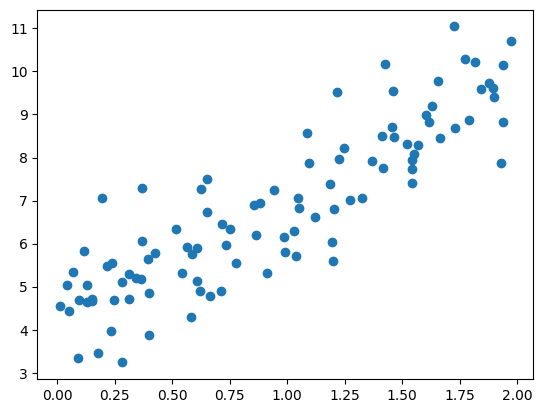

In [1667]:
import numpy as np
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X) +np.random.randn(100, 1)


import matplotlib.pyplot as plt
plt.plot(X,y,'o')

In [1668]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [1669]:
np.ones((100, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [1670]:

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
X_b


array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [1671]:

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best



array([[4.21509616],
       [2.77011339]])

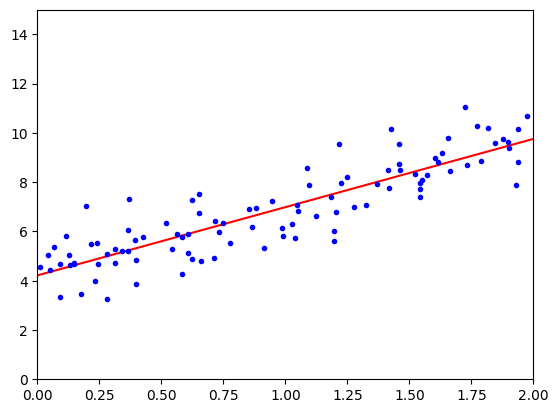

In [1672]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [1673]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [1674]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [1675]:
theta

array([[4.21509616],
       [2.77011339]])

In [1676]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [1677]:
theta

array([[4.18475289],
       [2.73036719]])

In [1678]:
y.ravel()

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995,
        5.29307969,  5.82639572,  8.67878666,  6.79819647,  7.74667842,
        5.03890908, 10.14821022,  8.46489564,  5.7873021 ,  5.18802735,
        6.06907205,  5.12340036,  6.82087644,  6.19956196,  4.28385989,
        7.96723765,  5.09801844,  5.75798135,  5.96358393,  5.32104916,
        8.29041045,  4.85532818,  6.28312936,  7.3932017 ,  4.68275333,
        9.53145501,  5.19772255,  4.64785995,  9.61886731,  7.87502098,
        8.82387021,  5.88791282,  7.0492748 ,  7.91303719,  6.9424623 ,
        4.69751764,  5.80238342,  5.34915394, 10.20785545,  6.34371184,
        7.06574625,  7.27306077,  5.71855706,  7.86711877,  7.29958236,
        8.82697144,  8.08449921,  9.73664501,  8.86548845,  6.03673644,
        9.59980838,  3.4686513 ,  5.64948961,  3.3519395 ,  7.50191639,
        5.54881045,  5.30603267,  9.78594227,  4.90965564,  5.91306699,
        8.56331925,  3.23806212,  8.99781574,  4.70718666, 10.70

In [1679]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [1680]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [1681]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
param_grid = [
{'eta0': [0.01, 0.001, 0.0001], 'max_iter': [10000,100000,1_000_000]}
]
sgd_reg = SGDRegressor(tol=1e-5, penalty=None, n_iter_no_change=100, random_state=42)
grid_search = GridSearchCV(sgd_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X, y.ravel())

GridSearchCV(cv=5,
             estimator=SGDRegressor(n_iter_no_change=100, penalty=None,
                                    random_state=42, tol=1e-05),
             param_grid=[{'eta0': [0.01, 0.001, 0.0001],
                          'max_iter': [10000, 100000, 1000000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [1682]:
grid_search.best_params_

{'eta0': 0.01, 'max_iter': 10000}

In [1683]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

param_distribs = {'eta0': uniform(0,2),'max_iter': randint(low=1000, high=100000)}

sgd_reg = SGDRegressor(tol=1e-5, penalty=None, n_iter_no_change=100, random_state=42)

rnd_search = RandomizedSearchCV(sgd_reg, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(X, y.ravel())


RandomizedSearchCV(cv=3,
                   estimator=SGDRegressor(n_iter_no_change=100, penalty=None,
                                          random_state=42, tol=1e-05),
                   param_distributions={'eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023D293C9FC0>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023D2684FDF0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [1684]:
rnd_search.best_params_

{'eta0': 0.749080237694725, 'max_iter': 1860}

In [1685]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1860, tol=1e-5, penalty=None, eta0=0.74, n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets


SGDRegressor(eta0=0.74, max_iter=1860, n_iter_no_change=100, penalty=None,
             random_state=42, tol=1e-05)

In [1686]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21194239]), array([2.90840651]))

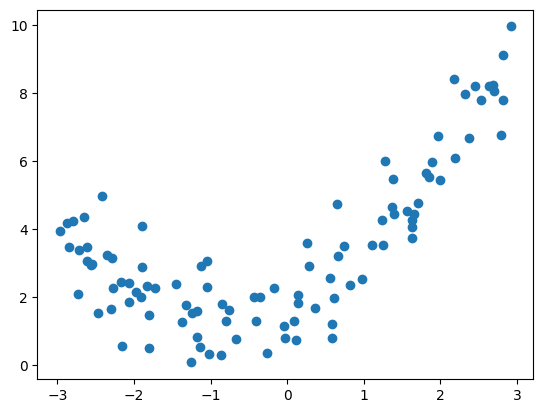

In [1687]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

import matplotlib.pyplot as plt
plt.plot(X,y,'o')


In [1688]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)




In [1689]:
X[0]

array([-0.75275929])

In [1690]:
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845])

In [1691]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.78437842]), array([[ 1.02570217,  0.56304305, -0.01702965]]))

In [1692]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
scores2 = cross_val_score(lin_reg, X_poly, y, scoring="neg_mean_squared_error", cv=10)
lin_reg_scores = np.sqrt(-scores1)
poly_reg_scores = np.sqrt(-scores2)
lin_reg_scores.mean()



1.765615325687514

In [1693]:

poly_reg_scores.mean()


0.897777477129582

In [1694]:
np.linspace(0.01, 1.0, 40)

array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])

In [1695]:
np.linspace(0.01, 1.0, 40)

array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])

In [1696]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")


In [1697]:
valid_scores

array([[-2.36452507, -2.56711283, -3.314824  , -2.97448171, -2.78963255],
       [-2.12424827, -2.63795855, -2.73836243, -2.40638514, -2.52612012],
       [-2.24768665, -3.38468313, -3.52295015, -3.21137327, -3.17221406],
       [-2.08744135, -1.70148586, -1.90960018, -1.6399481 , -1.83534705],
       [-2.17835195, -1.62096626, -1.80870297, -1.66835092, -1.80291772],
       [-2.2905765 , -1.58871859, -1.88234967, -1.69665652, -1.7828119 ],
       [-2.1246079 , -1.67393841, -1.81810739, -1.7211748 , -1.8505214 ],
       [-1.86155114, -1.65425749, -1.80434756, -1.68849295, -1.83168328],
       [-1.8638321 , -1.63037146, -1.79838675, -1.65888628, -1.80909469],
       [-1.87177026, -1.59682799, -1.82062495, -1.64128491, -1.77988038],
       [-1.87307251, -1.59525437, -1.84576391, -1.63518384, -1.77703725],
       [-1.90651726, -1.58821386, -1.84934809, -1.63883422, -1.77694417],
       [-1.87555049, -1.60173089, -1.897251  , -1.6604848 , -1.79014693],
       [-1.87789589, -1.59310933, -1.8

In [1698]:

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
train_errors

array([-0.00000000e+00,  3.40032635e-16,  1.21917626e+00,  1.55444643e+00,
        1.67538750e+00,  1.66043001e+00,  1.87246874e+00,  1.77194988e+00,
        1.73293770e+00,  1.77993138e+00,  1.76856361e+00,  1.77297636e+00,
        1.80788097e+00,  1.75305712e+00,  1.75504512e+00,  1.76723624e+00,
        1.75137416e+00,  1.78154893e+00,  1.75109417e+00,  1.76356708e+00,
        1.74809325e+00,  1.76183606e+00,  1.76981557e+00,  1.74279296e+00,
        1.73842344e+00,  1.77957666e+00,  1.79762131e+00,  1.78590497e+00,
        1.76560991e+00,  1.74736661e+00,  1.75519418e+00,  1.75392236e+00,
        1.76470581e+00,  1.74127910e+00,  1.74945465e+00,  1.75076847e+00,
        1.74085617e+00,  1.73672095e+00,  1.73915788e+00,  1.73796725e+00])

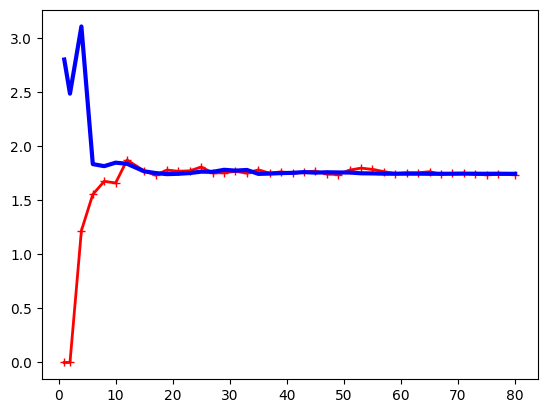

In [1699]:

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.show()


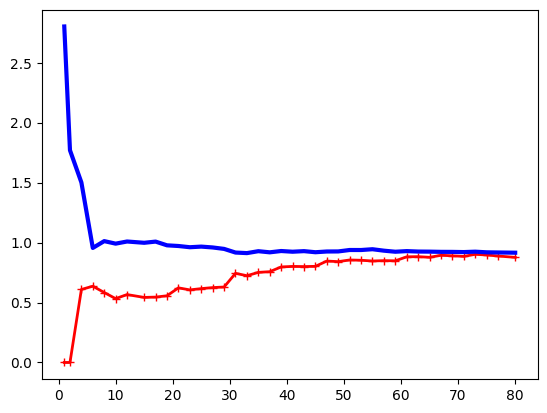

In [1700]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
PolynomialFeatures(degree=2, include_bias=False),
LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.show()


In [1701]:

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])





array([[4.82899748]])

In [1702]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])


array([4.82830117])

In [1703]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([4.77621741])

In [1704]:
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1 , tol=None,
max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([4.77557733])

In [1705]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([4.78114505])

In [1706]:
X_new = np.c_[ X, y]
X_new

array([[-0.75275929,  1.61761105],
       [ 2.70428584,  8.06185944],
       [ 1.39196365,  4.45250583],
       [ 0.59195091,  0.77958493],
       [-2.06388816,  1.84625712],
       [-2.06403288,  2.42319555],
       [-2.65149833,  4.34161741],
       [ 2.19705687,  6.09231611],
       [ 0.60669007,  1.98223289],
       [ 1.24843547,  3.52597398],
       [-2.87649303,  4.17601517],
       [ 2.81945911,  9.12288507],
       [ 1.99465584,  5.45422161],
       [-1.72596534,  2.27678027],
       [-1.9090502 ,  2.01026368],
       [-1.89957294,  2.87326073],
       [-1.17454654,  0.81318015],
       [ 0.14853859,  1.8319083 ],
       [-0.40832989,  1.28292861],
       [-1.25262516,  0.06839479],
       [ 0.67111737,  3.19243691],
       [-2.16303684,  2.43738261],
       [-1.24713211,  1.5356506 ],
       [-0.80182894,  1.28504875],
       [-0.26358009,  0.3557864 ],
       [ 1.71105577,  4.75426637],
       [-1.80195731,  1.47885324],
       [ 0.08540663,  1.28677651],
       [ 0.55448741,

In [1707]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_set, valid_set= train_test_split(X_new, test_size=0.2, random_state=42) # split the quadratic dataset
X_train=train_set[:,0:1]
y_train=train_set[:,1:2]
X_valid=valid_set[:,0:1]
y_valid=valid_set[:,1:2]
y_valid


array([[3.46656736],
       [6.67148391],
       [3.73062776],
       [2.54118912],
       [2.39107959],
       [2.00693334],
       [1.5356506 ],
       [8.41758883],
       [4.17601517],
       [1.61761105],
       [1.28292861],
       [4.73964113],
       [5.98103968],
       [8.24583537],
       [3.14437931],
       [1.84625712],
       [4.27217418],
       [2.94240486],
       [5.45422161],
       [2.15170091]])

In [1708]:

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 1000
best_epoch=0
best_valid_rmse = float('inf')
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
        best_epoch=epoch

#best_model.intercept_,best_model.coef_
best_epoch

385